# Lab 04

## Solving a system of ordinary differential equations

### Konks Eric, Б01-818

VIII.11.1

$$u' = A + u^2v - (B+1)v,\ \ u(0)=1$$

$$v' = Bu-u^2v,\ \ v(0)=1$$

$$A = 1, B\in[1, 5]$$

In [1]:
import unittest
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#logging.basicConfig(level=logging.DEBUG)

In [3]:
class ODE:
    def __init__(self):
        self.log = logging.getLogger("ODE")
    
    def solve(self, stages, c_vec, b_vec, a, f_vec, u_init, h, t_range):
        u_res = [u_init,]
        t_res = [t_range[0],]
        while t_res[-1] < t_range[1]:
            u_cur = [0 for _ in range(len(f_vec))]
            k = [[0 for _ in range(stages)] for _ in range(len(f_vec))]
            for s in range(stages):
                u_k = [u_res[-1][j]+h*sum(a[s][m]*k[j][m] for m in range(s)) for j in range(len(f_vec))]
                self.log.debug(f"Iter[{t_res[-1]}]: u_k: {u_k}")
                for i in range(len(f_vec)):
                    k[i][s] = f_vec[i](t_res[-1]+c_vec[s]*h, u_k)      

            for i in range(len(f_vec)):
                u_cur[i] = u_res[-1][i]+h*sum(b_vec[s]*k[i][s] for s in range(stages))
            
            self.log.debug(f"Iter[{t_res[-1]}]: k: {k}")
            u_res.append(u_cur)
            t_res.append(t_res[-1]+h)
            
        return (t_res, u_res)

In [8]:
c_vec = [0, 1/2, 1/2, 1]
b_vec = [1/6, 2/6, 2/6, 1/6]
a = [[0,0,0,0],
     [1/2,0,0,0],
     [0,1/2,0,0],
     [0,0,1,0]]
u_init = [1, 1]
t_range = (0, 10)
h = 0.01
A = 1
B = 3
f1 = lambda t, u_vec: A+u_vec[0]**2*u_vec[1]-(B+1)*u_vec[1]
f2 = lambda t, u_vec: B*u_vec[0]-u_vec[0]**2*u_vec[1]
f_vec = [f1, f2]
ode = ODE()
res = ode.solve(len(c_vec), c_vec, b_vec, a, f_vec, u_init, h, t_range)
df = pd.DataFrame({"t": res[0], "(u,v)": res[1]})
print(df)

          t                                       (u,v)
0      0.00                                      [1, 1]
1      0.01    [0.9794973596213974, 1.0198002841375324]
2      0.02    [0.9579791161539187, 1.0392018616204985]
3      0.03     [0.9354304389066465, 1.058204812243316]
4      0.04    [0.9118375758246938, 1.0768077336163422]
...     ...                                         ...
997    9.97   [-0.5603298423143631, 0.3361895607306417]
998    9.98   [-0.5623885645442757, 0.3183156931049868]
999    9.99  [-0.5637825549544568, 0.30044037092625153]
1000  10.00   [-0.5645150389025767, 0.2825863161102601]
1001  10.01  [-0.5645896702985161, 0.26477567835703203]

[1002 rows x 2 columns]


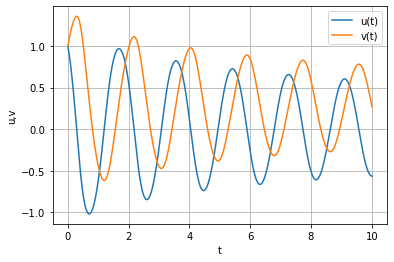

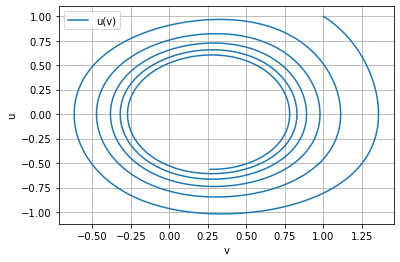

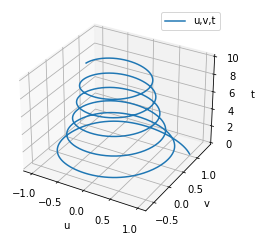

In [9]:
plt.plot(res[0], [j[0] for j in res[1]], label="u(t)")
plt.plot(res[0], [j[1] for j in res[1]], label="v(t)")
plt.grid(True)
plt.xlabel('t')
plt.ylabel('u,v')
plt.legend()
plt.show()
plt.plot([j[1] for j in res[1]], [j[0] for j in res[1]], label="u(v)")
plt.grid(True)
plt.xlabel('v')
plt.ylabel('u')
plt.legend()
plt.show()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([j[0] for j in res[1]], [j[1] for j in res[1]], res[0], label="u,v,t")
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('t')
plt.legend()
plt.show()